# DS_C4_S9

# Data Preprocessing

Count the number of missing values in each column and perform missing value treatment Replace the missing values with the mean or median for numerical columns based on the existing values within the same manufacturer's group and replace the missing values in categorical columns with "Not Available™
Note: Do not consider all records (rows) while imputing data for missing value treatment

In [2]:
import pandas as pd
df = pd.read_excel('DS1_C4_S9_Car_Data.xlsx')
df.head()

,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,Height_mm,...,Central_Locking,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning
0,0,Tata,Nano Genx,Xt,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,624.0,2.0,2.0,24.0,Petrol,1652.0,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,624.0,2.0,2.0,15.0,CNG,1652.0,...,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,624.0,2.0,2.0,24.0,Petrol,1652.0,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# STEP 1: Count missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 S. No.                               0
Make                                75
Model                                0
Variant                              0
Displacement                        12
Cylinders                           66
Valves_Per_Cylinder                102
Fuel_Tank_Capacity_litre            69
Fuel_Type                            0
Height_mm                            1
Length_mm                            0
Width_mm                            12
Body_Type                            6
Doors                                4
City_Mileage_km_litre              555
Highway_Mileage_km_litre           800
Kerb_Weight                        365
Power                                0
Torque                               2
Seating_Capacity                     6
Central_Locking                    149
Child_Safety_Locks                  75
Hill_Assist                        796
Drive_Modes                       1081
High_Speed_Alert_System         

In [21]:
# Step 2: List of numerical columns
num_col = ['Displacement', 'Cylinders', 'Valves_Per_Cylinder', 'Fuel_Tank_Capacity_litre', 'Height_mm']

# Replace missing values with group mean first, then with overall mean if group mean is not available
for col in num_col:
    df[col] = df.groupby('Make')[col].transform(lambda x: x.fillna(x.mean()))  # Fill with group mean
    df[col] = df[col].fillna(df[col].mean())  # Fill remaining NaN with overall mean

# Check if all missing values are filled
print(df[num_col].isnull().sum())  # Should show 0 for all columns if everything is filled

Displacement                0
Cylinders                   0
Valves_Per_Cylinder         0
Fuel_Tank_Capacity_litre    0
Height_mm                   0
dtype: int64


In [47]:
# Step 3: Replace missing values in categorical columns with "Not Available"
categorical_columns = ['Fuel_Type', 'Central_Locking', 'Child_Safety_Locks', 'Drive_Modes', 'ABS_(Anti-lock_Braking_System)', 'Airbags']

df[categorical_columns] = df[categorical_columns].fillna('Not Available')
df.head(5)

,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,Height_mm,...,Central_Locking,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning
0,0,Tata,Nano Genx,Xt,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Yes,Yes,NaN,Not Available,NaN,Not Available,NaN,Not Available,NaN,NaN
1,1,Tata,Nano Genx,Xe,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Not Available,Yes,NaN,Not Available,NaN,Not Available,NaN,Not Available,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,624.0,2.0,2.0,15.0,CNG,1652.0,...,Not Available,Yes,Yes,Not Available,NaN,Not Available,NaN,Not Available,NaN,NaN
3,3,Tata,Nano Genx,Xta,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Yes,Yes,NaN,Not Available,NaN,Not Available,NaN,Not Available,NaN,NaN
4,4,Tata,Nano Genx,Xm,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Not Available,Yes,NaN,Not Available,NaN,Not Available,NaN,Not Available,NaN,NaN


# Market Segmentation Analysis
Identify and categorize cars based on make, model, and body type to understand market trends and consumer preferences.

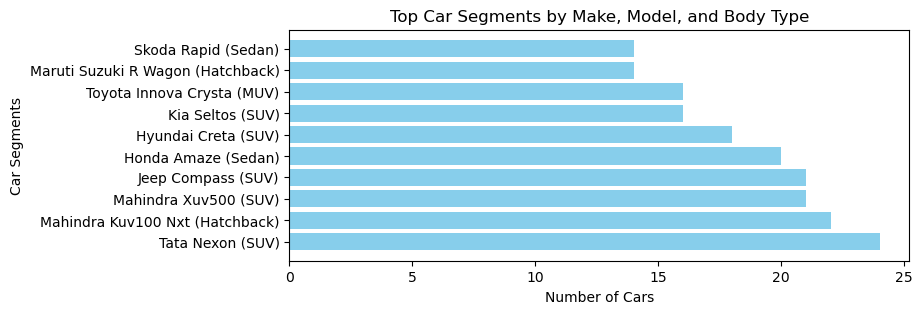

In [42]:
# Group by make, model, and body type, then count occurrences
segmentation = df.groupby(['Make', 'Model', 'Body_Type']).size().reset_index(name='Count')
top_seg = segmentation.sort_values(by='Count', ascending=False).head(10)

plt.figure(figsize=(8, 3))
plt.barh(top_seg['Make'] + ' ' + top_seg['Model'] + ' (' + top_seg['Body_Type'] + ')',top_seg['Count'], color='skyblue')
plt.title('Top Car Segments by Make, Model, and Body Type')
plt.xlabel('Number of Cars')
plt.ylabel('Car Segments')
plt.show()

# Task 1
A car manufacturer wants to introduce a new car and requires information about the top 5 most preferred car body types. Display the results using a horizontal bar chart

In [24]:
import matplotlib.pyplot as plt

body_type_count = df['Body_Type'].value_counts().head(5) # Count the occurrences of each body type
body_type_count

Body_Type
SUV          447
Sedan        333
Hatchback    316
Coupe         41
MUV           39
Name: count, dtype: int64

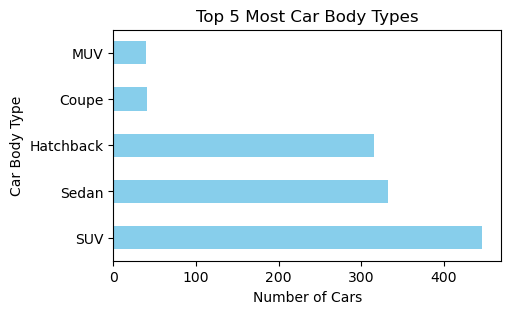

In [48]:
body_type_count.plot(kind='barh', figsize=(5, 3), color='skyblue')
plt.title('Top 5 Most Car Body Types')
plt.xlabel('Number of Cars')
plt.ylabel('Car Body Type')
plt.show()

# Task 2 
List all the details of cars that can adapt to various driving conditions such as normal, comfort, eco, sport, and power mode. How many cars have all the above-mentioned features?

In [27]:
# Filter for cars that support all the driving modes: 'Normal', 'Comfort', 'Eco', 'Sport', 'Power'
filtered_cars = df[df['Drive_Modes'].str.contains('Normal') & df['Drive_Modes'].str.contains('Comfort') & 
                df['Drive_Modes'].str.contains('Eco') & df['Drive_Modes'].str.contains('Sport') & df['Drive_Modes'].str.contains('Power')]
print(filtered_cars)

car_count = filtered_cars.shape[0]
print(f"\nTotal number of cars that support all driving modes: {car_count}")

     S. No.  Make Model                    Variant  Displacement  Cylinders  \
321     321  Audi    Q8  55 Tfsi Quattro Tiptronic        2995.0        4.0   
330     330  Audi  A8 L            55 Tfsi Quattro        2995.0        8.0   

     Valves_Per_Cylinder  Fuel_Tank_Capacity_litre Fuel_Type  Height_mm  ...  \
321                  4.0                      85.0    Petrol     1740.0  ...   
330                  4.0                      82.0    Petrol     1485.0  ...   

     Central_Locking  Child_Safety_Locks Hill_Assist  \
321              Yes                 Yes         Yes   
330              Yes                 Yes         Yes   

                                 Drive_Modes  High_Speed_Alert_System  \
321  Normal, Comfort, Eco, Sport, Power Mode                      Yes   
330  Normal, Comfort, Eco, Sport, Power Mode                      Yes   

     ABS_(Anti-lock_Braking_System) Gross_Vehicle_Weight  \
321                             Yes              2830 kg   
330         

# Fuel Efficiency Analysis
Evaluate the fuel efficiency of different car models by analyzing city and highway mileage, helping manufacturers focus on eco- friendly designs

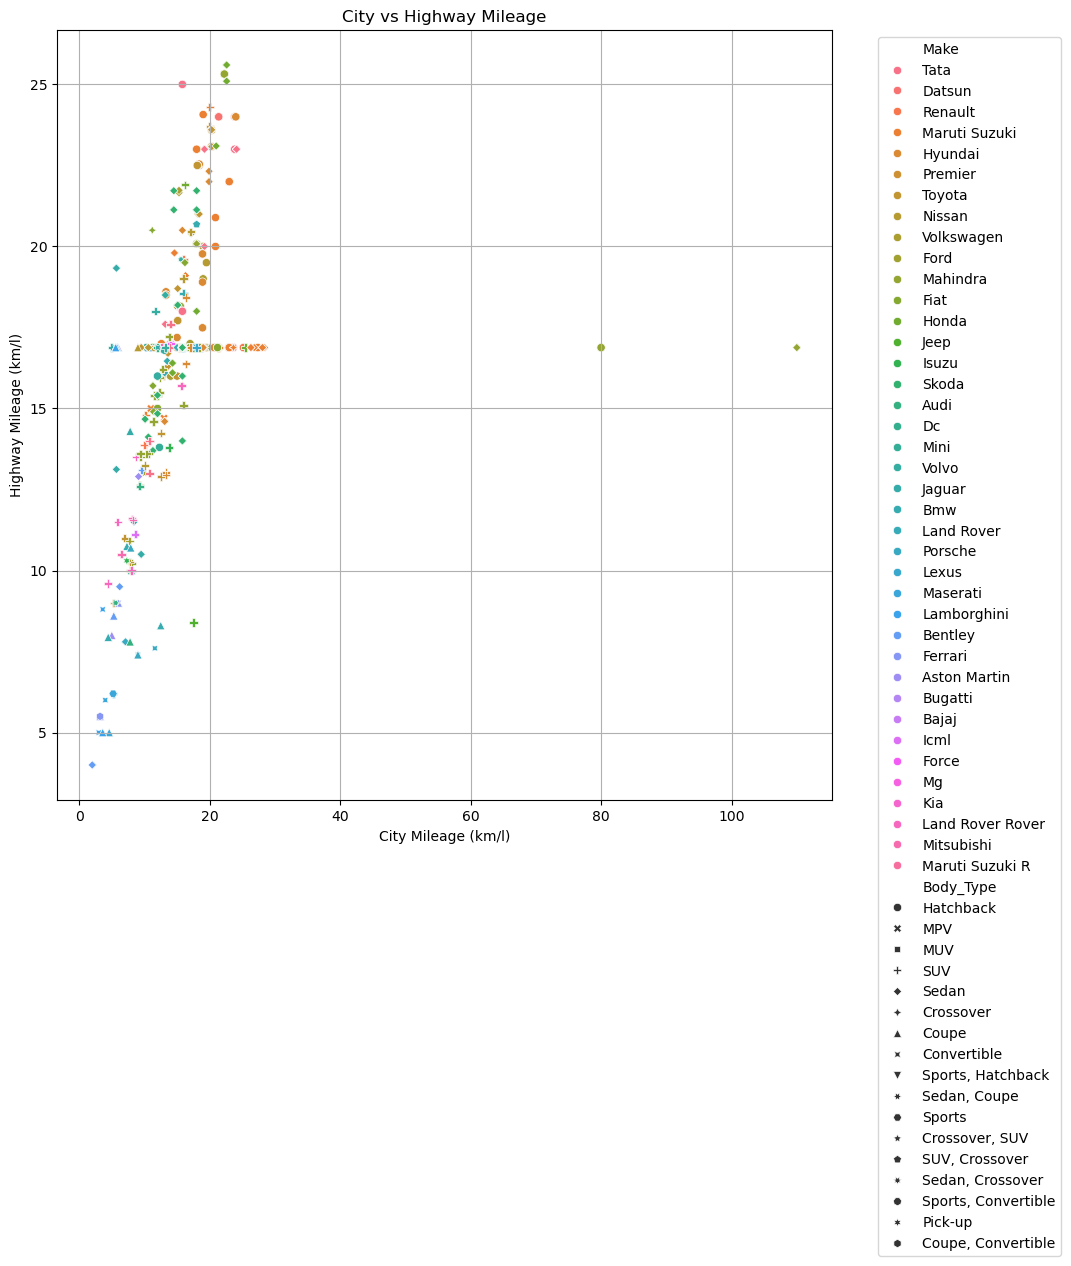

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fill missing values for city and highway mileage
df['City_Mileage_km_litre'] = df['City_Mileage_km_litre'].fillna(df['City_Mileage_km_litre'].mean())
df['Highway_Mileage_km_litre'] = df['Highway_Mileage_km_litre'].fillna(df['Highway_Mileage_km_litre'].mean())

# Plot City vs Highway Mileage
plt.figure(figsize=(10, 10))
sns.scatterplot(x='City_Mileage_km_litre', y='Highway_Mileage_km_litre', data=df, hue='Make', style='Body_Type')
plt.title('City vs Highway Mileage')
plt.xlabel('City Mileage (km/l)')
plt.ylabel('Highway Mileage (km/l)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [27]:
# # Calculate mean mileage
# city_mileage_mean = df['City_Mileage_km_litre'].mean()
# highway_mileage_mean = df['Highway_Mileage_km_litre'].mean()

# # Display cars with above-average fuel efficiency
# efficient_cars = df[(df['City_Mileage_km_litre'] > city_mileage_mean) & 
#                     (df['Highway_Mileage_km_litre'] > highway_mileage_mean)]
# print(efficient_cars[['Make', 'Model', 'City_Mileage_km_litre', 'Highway_Mileage_km_litre']])

# Task 3
Identify the top 10 car manufacturers based on the city mileage and display the result using a horizontal bar graph with the manufacturer on the y-axis and mileage on the x-axis.
Do you notice any outliers in the above output? If yes, what is the reason, and how would you resolve it?

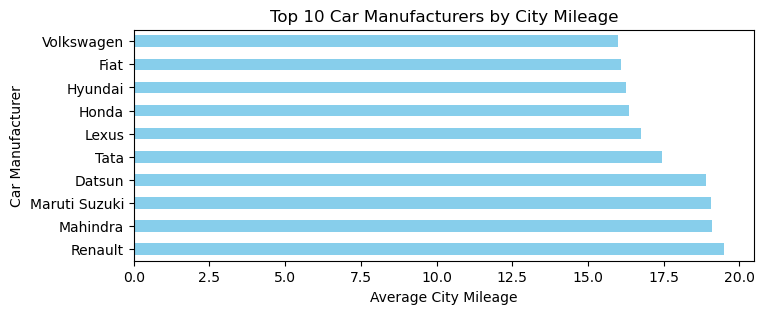

In [51]:
avg_city_mileage = df.groupby('Make')['City_Mileage_km_litre'].mean()
top_10_makes = avg_city_mileage.sort_values(ascending=False).head(10) # Sort by highest city mileage and select top 10 manufacturers

top_10_makes.plot(kind='barh', figsize=(8, 3), color='skyblue')
plt.title('Top 10 Car Manufacturers by City Mileage')
plt.xlabel('Average City Mileage')
plt.ylabel('Car Manufacturer')
plt.show()

In [10]:
# Detecting outliers using the IQR method
Q1 = avg_city_mileage.quantile(0.25)
Q3 = avg_city_mileage.quantile(0.75)
IQR = Q3 - Q1

# Outliers are those points that fall below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
outliers = avg_city_mileage[(avg_city_mileage < (Q1 - 1.5 * IQR)) | (avg_city_mileage > (Q3 + 1.5 * IQR))]

print("Outliers based on city mileage:\n", outliers)

Outliers based on city mileage:
 Series([], Name: City_Mileage_km_litre, dtype: float64)


Extreme Values: A manufacturer could have one or two models with very high or very low city mileage.
By identifying and handling these outliers, to ensure that analysis reflects the general trends more accurately without incorrect data.

# Task 4
Identify the top 20 non-electric car manufacturers based on city milleage and display the results using a bar graph similar to that in task 1

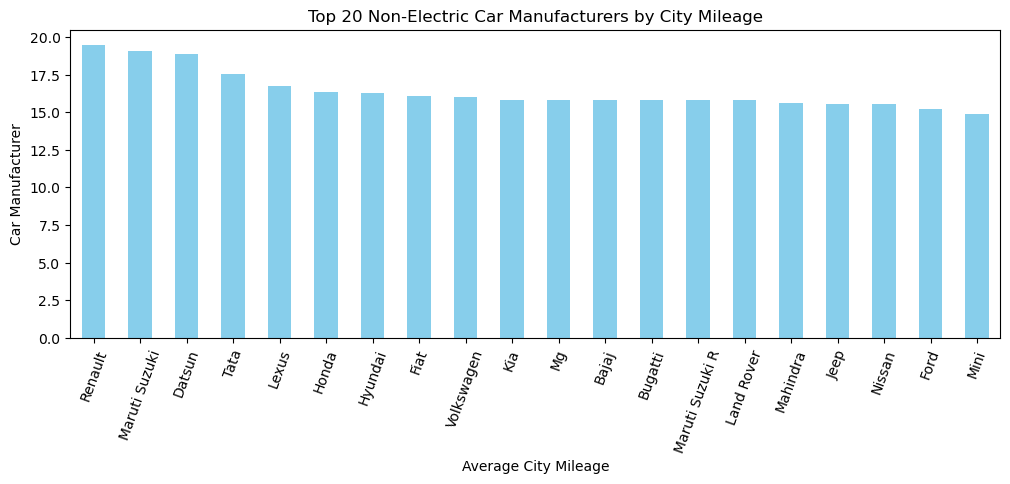

In [56]:
non_elec_car = df[df['Fuel_Type'] != 'Electric'] 
avg_mileage_non_elec = non_elec_car.groupby('Make')['City_Mileage_km_litre'].mean() # Group by 'Make' and cal avg city mileage of non-electric cars

top_20 = avg_mileage_non_elec.sort_values(ascending=False).head(20)  # Sort by highest city mileage and select top 20 manufacturers

top_20.plot(kind='bar',figsize=(12, 4), color='skyblue')
plt.title('Top 20 Non-Electric Car Manufacturers by City Mileage')
plt.xlabel('Average City Mileage')
plt.ylabel('Car Manufacturer')
plt.xticks(rotation=70)
plt.show()

# Task 5
Display the car mileages for the following four companies using a pivot table: Hyundai, Mahindra, Renault, and Skoda

Create 4 separate pivot tables capturing the following details
1. Mean of city mileage 
2. Median of city mileage
3. Mean of highway mileage 
4. Median of highway mileage

In [87]:
fil_data = df[df['Make'].isin(['Hyundai', 'Mahindra', 'Renault', 'Skoda'])]

# Create Pivot Tables
# Mean of city mileage
pivot_mean_city = fil_data.pivot_table(values='City_Mileage_km_litre', index='Make', aggfunc='mean')
print("Mean City Mileage:\n", pivot_mean_city)

# Median of city mileage
pivot_median_city = fil_data.pivot_table(values='City_Mileage_km_litre', index='Make', aggfunc='median')
print("\nMedian City Mileage:\n", pivot_median_city)

# Mean of highway mileage
pivot_mean_highway = fil_data.pivot_table(values='Highway_Mileage_km_litre', index='Make', aggfunc='mean')
print("\nMean Highway Mileage:\n", pivot_mean_highway)

# Median of highway mileage
pivot_median_highway = fil_data.pivot_table(values='Highway_Mileage_km_litre', index='Make', aggfunc='median')
print("\nMedian Highway Mileage:\n", pivot_median_highway)

Mean City Mileage:
           City_Mileage_km_litre
Make                           
Hyundai               16.267567
Mahindra              19.088655
Renault               19.501196
Skoda                 14.516278

Median City Mileage:
           City_Mileage_km_litre
Make                           
Hyundai               15.815381
Mahindra              15.815381
Renault               21.040000
Skoda                 15.100000

Mean Highway Mileage:
           Highway_Mileage_km_litre
Make                              
Hyundai                  17.538231
Mahindra                 17.645126
Renault                  17.315000
Skoda                    17.252093

Median Highway Mileage:
           Highway_Mileage_km_litre
Make                              
Hyundai                      17.19
Mahindra                     17.19
Renault                      17.19
Skoda                        17.19


# Task 6
Display the mean and median values of city mileages of the following manufacturers, using a stacked column chart Hyundai, Renault, Mahindra, and Skoda

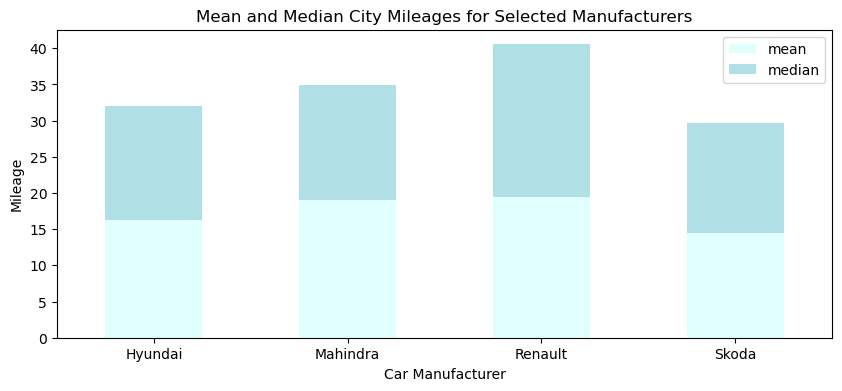

In [68]:
# Filter data and calculate mean/median city mileage for specified manufacturers
mileage_df = df[df['Make'].isin(['Hyundai', 'Mahindra', 'Renault', 'Skoda'])].groupby('Make')['City_Mileage_km_litre'].agg(['mean', 'median'])
mileage_df.plot(kind='bar', stacked=True, figsize=(10,4), color=['lightcyan', 'powderblue'])
plt.title('Mean and Median City Mileages for Selected Manufacturers')
plt.xlabel('Car Manufacturer')
plt.ylabel('Mileage')
plt.xticks(rotation=0)
plt.show()

# Task 7
Display the average mileage (city and highway) of all manufacturers using a horizontal bar chart, in ascending order of mileage.

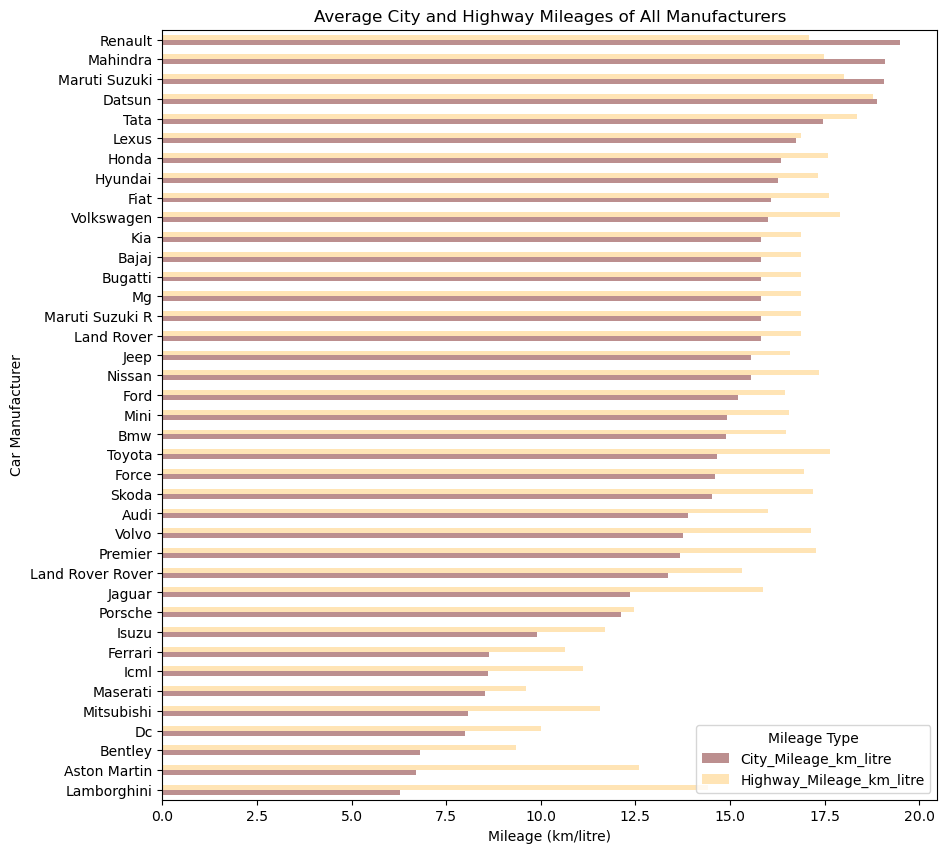

In [69]:
# avg_mileage = df.groupby('Make')[['City_Mileage_km_litre', 'Highway_Mileage_km_litre']].mean()
# avg_mileage = avg_mileage.sort_values(by='City_Mileage_km_litre')  # Sort by city mileage
avg_mileage = df.groupby('Make')[['City_Mileage_km_litre', 'Highway_Mileage_km_litre']].mean().sort_values(by='City_Mileage_km_litre')

# Step 4: Plot the horizontal bar chart
avg_mileage.plot(kind='barh', figsize=(10, 10), color=['rosybrown', 'moccasin'])
plt.title('Average City and Highway Mileages of All Manufacturers')
plt.xlabel('Mileage (km/litre)')
plt.ylabel('Car Manufacturer')
plt.legend(title='Mileage Type')
plt.show()

# Task 8
Plot a line chart to understand the relation between displacement and city mileage by choosing the top 10 cars with the highest city mileage.
What do you infer from this graph? Are there any unusual observations? If yes, how would you resolve thes?


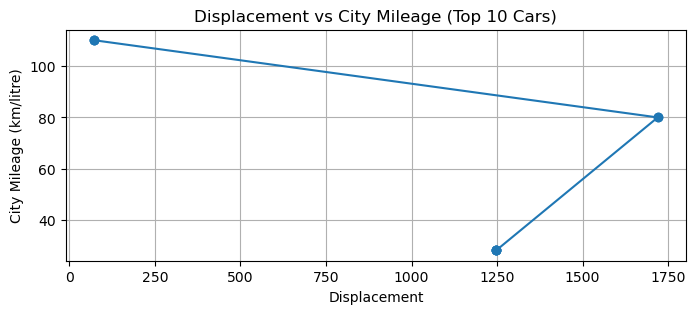

In [72]:
top_cars = df.sort_values(by='City_Mileage_km_litre', ascending=False).head(10)

plt.figure(figsize=(8, 3))
plt.plot(top_cars['Displacement'], top_cars['City_Mileage_km_litre'], marker='o')
plt.title('Displacement vs City Mileage (Top 10 Cars)')
plt.xlabel('Displacement')
plt.ylabel('City Mileage (km/litre)')
plt.grid()
plt.show()

Graph: After plotting the graph, observe the trend between displacement and city mileage. Generally, you might see:
Inverse Relationship: A trend where higher displacement leads to lower city mileage due to larger engines consuming more fuel.

Unusual Observations: 
Outliers: Any car that deviates significantly from the trend might be worth noting.

# Task 9
Analyze the spread of fuel economy using a histogram for all car models of the following manufacturers Hyundai, Suzuki, Tata, and BMW
Which of these manufacturers has the most skewed mileage distribution?
Note: A separate histogram is required for each manufacturer

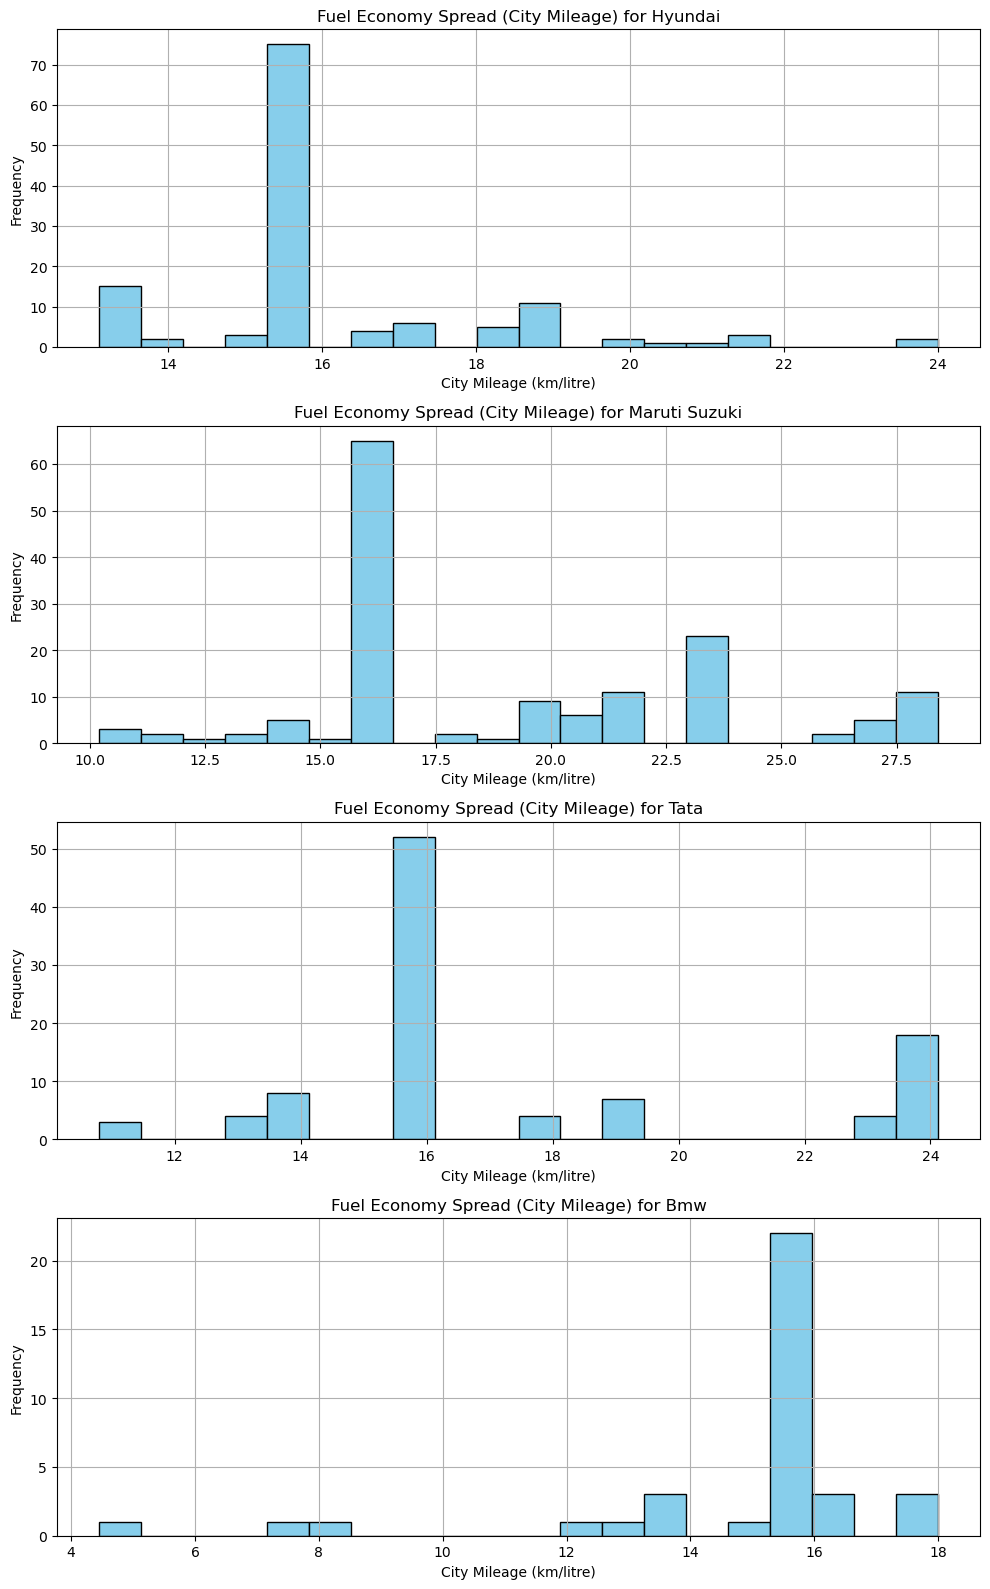

{'Hyundai': 1.2900588128271653, 'Maruti Suzuki': 0.5647672149631967, 'Tata': 0.780081264388293, 'Bmw': -2.461466063250788}


In [74]:
# TASK 9 : Analyse the spread of fuel economy using histogram for all car models of the following make: Hyundai, Suzuki,Tata and BMW

manu = ['Hyundai', 'Maruti Suzuki', 'Tata', 'Bmw']
filtered_df = df[df['Make'].isin(manu)]

# Set up the subplot grid
num_makes = len(manu)
fig, axes = plt.subplots(num_makes, 1, figsize=(10, 4 * num_makes))

# Loop through each manufacturer and create a histogram
for i, manufacturer in enumerate(manu):
    manufacturer_data = filtered_df[filtered_df['Make'] == manufacturer]

    # Create histogram for the current manufacturer
    axes[i].hist(manufacturer_data['City_Mileage_km_litre'], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_xlabel('City Mileage (km/litre)')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Fuel Economy Spread (City Mileage) for {manufacturer}')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

# Calculate skewness for each manufacturer
skewness = {}
for manufacturer in manu:
    manufacturer_data = filtered_df[filtered_df['Make'] == manufacturer]
    skewness[manufacturer] = manufacturer_data['City_Mileage_km_litre'].skew()
print(skewness)

# The manufacturer with the most skewed mileage distribution is Bmw.

# Task 10
Create another data frame that includes only the following columns from the data. Perform missing value treatment, if required : Valves Per Cylinder,Kerb Weight Make,Displacement,Fuel Tank Capacity_litre, City Mileage_km_litre,Highway Mileage_km_litre,Power,Torque,Grass Vehicle Weight

In [37]:
import pandas as pd

# Select the specified columns
col = ['Valves_Per_Cylinder', 'Kerb_Weight', 'Make', 'Displacement', 'Fuel_Tank_Capacity_litre', 'City_Mileage_km_litre', 
       'Highway_Mileage_km_litre', 'Power', 'Torque', 'Gross_Vehicle_Weight']
df1 = df[col]

# Perform missing value treatment
for column in df1.columns:
    if df1[column].dtype in ['float64', 'int64']:  # For numerical columns
        df1.loc[:, column] = df1[column].fillna(df1[column].mean())  # Replace with mean
    else:  # For categorical columns
        df1.loc[:, column] = df1[column].fillna('Not Available')  # Replace with 'Not Available'

print(df1)

      Valves_Per_Cylinder Kerb_Weight        Make  Displacement  \
0                     2.0      660 kg        Tata         624.0   
1                     2.0      725 kg        Tata         624.0   
2                     2.0      710 kg        Tata         624.0   
3                     2.0      725 kg        Tata         624.0   
4                     2.0      725 kg        Tata         624.0   
...                   ...         ...         ...           ...   
1271                  4.0     1170 kg       Honda        1498.0   
1272                  4.0     1175 kg       Honda        1498.0   
1273                  4.0     1107 kg       Honda        1497.0   
1274                  4.0     1080 kg       Honda        1497.0   
1275                  4.0     2335 kg  Mitsubishi        3200.0   

      Fuel_Tank_Capacity_litre  City_Mileage_km_litre  \
0                         24.0              23.600000   
1                         24.0              23.600000   
2                       

# Task 11
Preprocess the data in the following columns as specified.

Kerb weight: Remove "kg" and ensure the column is numerical. Convert the weight in kilograms to pounds, by multiplying each value in the column with the number 2.2.

Gross Vehicle Weight: Remove "kg" and ensure the column is numerical. Convert the weight in kilograms to pounds, by multiplying each value in the column with the number 2.2

In [73]:
# Ensure the columns are treated as strings
df['Kerb_Weight'] = df['Kerb_Weight'].astype(str)
df['Gross_Vehicle_Weight'] = df['Gross_Vehicle_Weight'].astype(str)

df['Kerb_Weight'] = pd.to_numeric(df['Kerb_Weight'].str.replace(' kg', ''), errors='coerce') * 2.2   # Preprocessing Kerb Weight

# Preprocessing Gross Vehicle Weight
df['Gross_Vehicle_Weight'] = pd.to_numeric(df['Gross_Vehicle_Weight'].str.replace(' kg', ''), errors='coerce') * 2.2

kerb_weight_stats = df['Kerb_Weight'].describe()
gross_vehicle_weight_stats = df['Gross_Vehicle_Weight'].describe()
print("Kerb Weight Statistics:\n", kerb_weight_stats)
print("\nGross Vehicle Weight Statistics:\n", gross_vehicle_weight_stats)

Kerb Weight Statistics:
 count    9.110000e+02
mean     1.884227e+10
std      1.615540e+11
min      9.034084e+07
25%      1.400283e+08
50%      1.697313e+08
75%      2.354337e+08
max      1.441495e+12
Name: Kerb_Weight, dtype: float64

Gross Vehicle Weight Statistics:
 count    6.780000e+02
mean     1.186206e+08
std      3.565888e+07
min      1.275473e+07
25%      9.332732e+07
50%      1.088819e+08
75%      1.511903e+08
max      2.177637e+08
Name: Gross_Vehicle_Weight, dtype: float64


# Performance Comparison
The performance of the cars can be compared based on various factors described in upcoming tasks which will provide valuable insights for marketing and product development

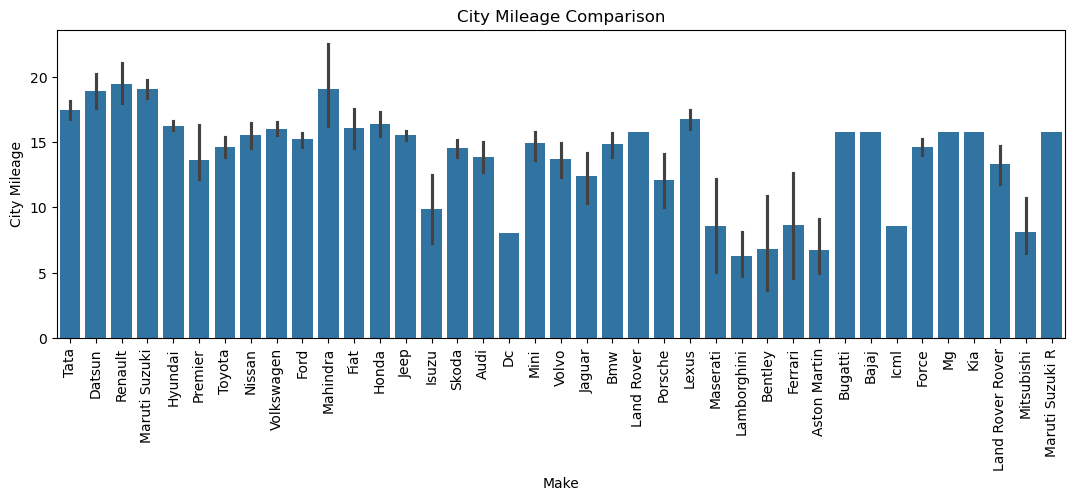

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(13,4)) # Bar graph comparing city mileage
sns.barplot(x='Make', y='City_Mileage_km_litre', data=df)
plt.title('City Mileage Comparison')
plt.ylabel('City Mileage')
plt.xticks(rotation=90)
plt.show()


# Task 12
Compare the performance of cars based on factors such as displacement, cylinders, and valves per cylinder, providing valuable insights for marketing and product development

Hint: Calculate and display the mean, median, standard deviation, and coefficient of variation for each manufacturer

For the "Displacement" column, display the distribution for each manufacturer using box plots

In [54]:
stats_df = df.groupby('Make').agg({'Displacement': ['mean', 'median', 'std'],
                                   'Cylinders': ['mean', 'median', 'std'],
                                   'Valves_Per_Cylinder': ['mean', 'median', 'std']})

stats_df[('Displacement', 'cv')] = stats_df[('Displacement', 'std')] / stats_df[('Displacement', 'mean')]
stats_df[('Cylinders', 'cv')] = stats_df[('Cylinders', 'std')] / stats_df[('Cylinders', 'mean')]
stats_df[('Valves_Per_Cylinder', 'cv')] = stats_df[('Valves_Per_Cylinder', 'std')] / stats_df[('Valves_Per_Cylinder', 'mean')]
print(stats_df)

                 Displacement                       Cylinders             \
                         mean  median          std       mean     median   
Make                                                                       
Aston Martin      5038.333333  5198.0   986.241519  10.666667  12.000000   
Audi              2256.354839  1984.0   836.304352   5.161290   4.000000   
Bajaj              216.000000   216.0     0.000000        NaN        NaN   
Bentley           5447.833333  5974.0  1164.710164  10.666667  12.000000   
Bmw               2707.918919  2979.0   924.567237   5.459459   6.000000   
Bugatti           7993.000000  7993.0     0.000000  16.000000  16.000000   
Datsun            1065.066667  1198.0   179.470836   3.000000   3.000000   
Dc                2000.000000  2000.0          NaN   4.000000   4.000000   
Ferrari           4589.500000  3902.0  1125.891647   8.500000   8.000000   
Fiat              1269.391304  1248.0    65.088568   4.000000   4.000000   
Force       

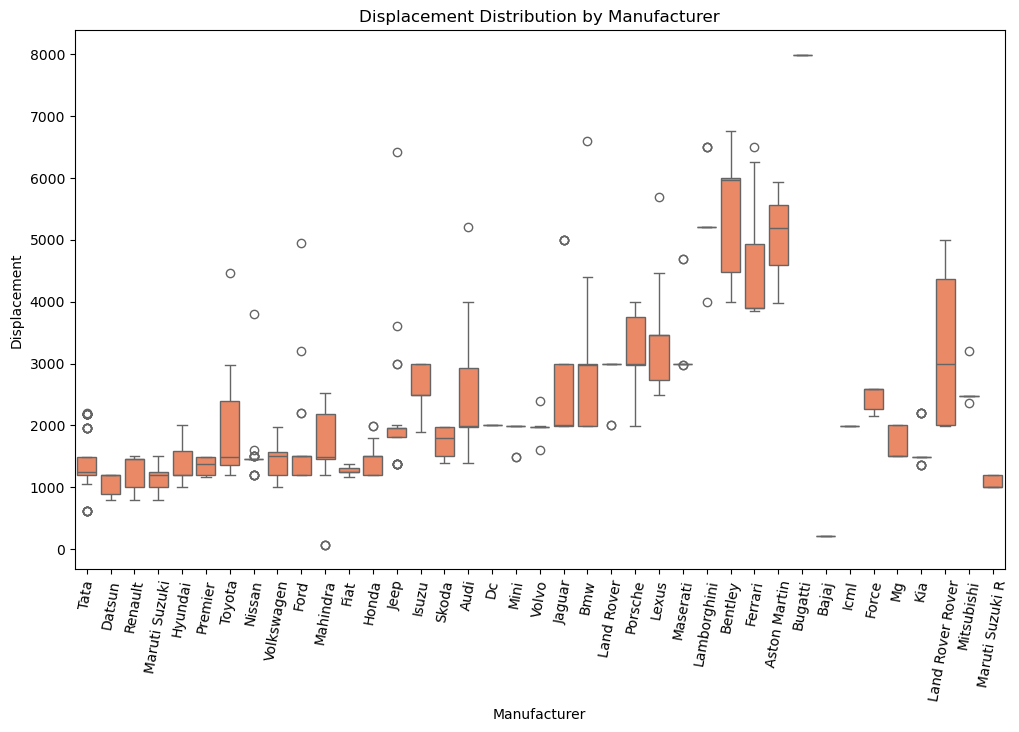

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 7))
sns.boxplot(x='Make', y='Displacement', data=df, color='coral')
plt.title('Displacement Distribution by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Displacement')
plt.xticks(rotation=80)
plt.show()

# Task 13
Identify at least three features that affect the mileages (using correlation analysis) of cars from the following manufacturers. Renault, Toyota, and Honda 

Represent them visually using appropriate types of charts/graphs in Python, Illustrate with justification whether these factors affect the mileage of a car positively or negatively.

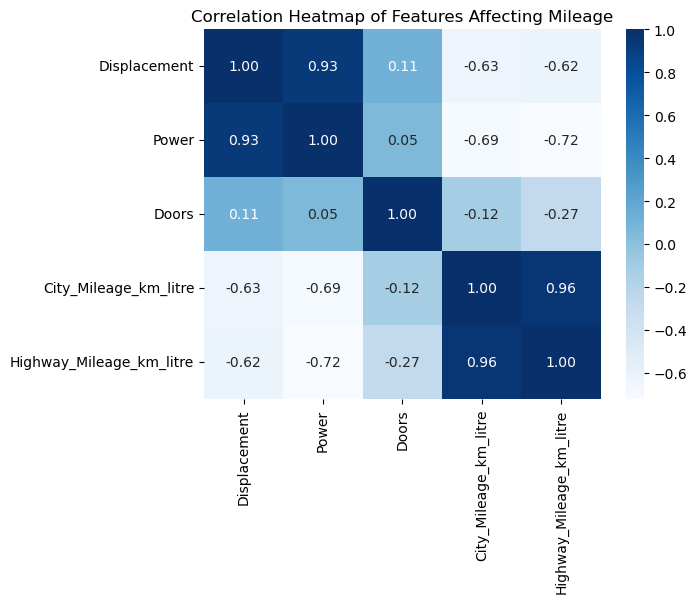

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

fil_df = df[df['Make'].isin(['Renault', 'Toyota', 'Honda'])]
filtered_data = fil_df[['Displacement', 'Power', 'Doors', 'City_Mileage_km_litre', 'Highway_Mileage_km_litre']]
corr_matrix = filtered_data.corr()

sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f") # Visualize correlations using a heatmap
plt.title('Correlation Heatmap of Features Affecting Mileage')
plt.show()

# Weight Distribution Study
Investigate the kerb weight and gross vehicle weight to understand weight distribution, influencing decisions related to materials and design for optimal performance.

In [68]:
kerb_weight_stats = df['Kerb_Weight'].describe()
gross_vehicle_weight_stats = df['Gross_Vehicle_Weight'].describe()

print("Kerb Weight Statistics:\n", kerb_weight_stats)
print("\nGross Vehicle Weight Statistics:\n", gross_vehicle_weight_stats)

Kerb Weight Statistics:
 count    9.110000e+02
mean     3.656115e+08
std      3.134761e+09
min      1.752955e+06
25%      2.717080e+06
50%      3.293430e+06
75%      4.568307e+06
max      2.797047e+10
Name: Kerb_Weight, dtype: float64

Gross Vehicle Weight Statistics:
 count    6.780000e+02
mean     2.301689e+06
std      6.919175e+05
min      2.474902e+05
25%      1.810904e+06
50%      2.112721e+06
75%      2.933664e+06
max      4.225442e+06
Name: Gross_Vehicle_Weight, dtype: float64


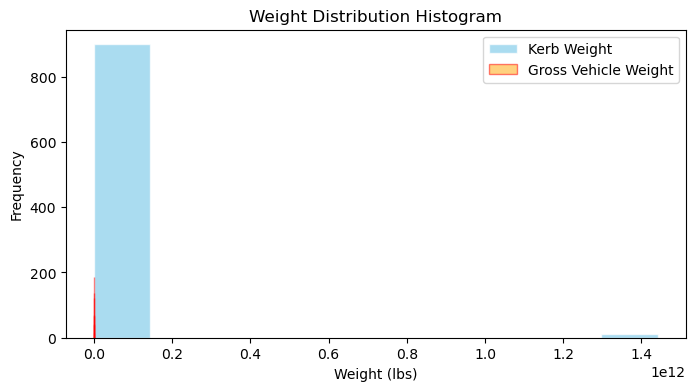

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.hist(df['Kerb_Weight'], bins=10, alpha=0.7, label='Kerb Weight', color='skyblue', edgecolor='white')
plt.hist(df['Gross_Vehicle_Weight'], bins=10, alpha=0.5, label='Gross Vehicle Weight', color='orange', edgecolor='red')
plt.title('Weight Distribution Histogram')
plt.xlabel('Weight (lbs)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Task 14
Compare the performance of cars based on factors like kerb weight and gross vehicle weight.
Hint: Calculate and display the mean, median, standard deviation, and coefficient of variation for each manufacturer


In [84]:
# Calculate statistics for each manufacturer
stats = df.groupby('Make').agg(
    mean_kerb_weight=('Kerb_Weight', 'mean'),
    median_kerb_weight=('Kerb_Weight', 'median'),
    std_kerb_weight=('Kerb_Weight', 'std'),
    cv_kerb_weight=('Kerb_Weight', lambda x: x.std() / x.mean() * 100),
    
    mean_gvw=('Gross_Vehicle_Weight', 'mean'),
    median_gvw=('Gross_Vehicle_Weight', 'median'),
    std_gvw=('Gross_Vehicle_Weight', 'std'),
    cv_gvw=('Gross_Vehicle_Weight', lambda x: x.std() / x.mean() * 100)).reset_index()

print(stats)

                Make  mean_kerb_weight  median_kerb_weight  std_kerb_weight  \
0       Aston Martin      2.372588e+08        2.299585e+08     3.211095e+07   
1               Audi      2.477529e+08        2.436465e+08     4.686485e+07   
2              Bajaj               NaN                 NaN              NaN   
3            Bentley      3.364284e+08        3.319342e+08     1.673510e+07   
4                Bmw      2.348927e+08        2.333805e+08     1.571771e+07   
5            Bugatti      2.730757e+08        2.730757e+08     0.000000e+00   
6             Datsun      1.182644e+08        1.182644e+08     0.000000e+00   
7                 Dc      2.162705e+08        2.162705e+08              NaN   
8            Ferrari      2.236278e+08        2.159283e+08     2.797503e+07   
9               Fiat      1.643864e+08        1.663093e+08     7.305406e+06   
10             Force               NaN                 NaN              NaN   
11              Ford      4.146116e+11        1.7794